In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9

In [332]:
#loading data
data= pd.read_csv("shot_logs.csv")
print(data.shape)

(128069, 21)


In [333]:
#droping not needed columns
data = data.drop(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK','SHOT_RESULT', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id'], axis = 1)
data = data.dropna()
print(data.shape)

(128069, 9)


# Who are league's best and worst catch&shoot 3-point shooters

In [160]:
# player_3ponter_attempt --> player_3pa
player_3pa = data[ (data['DRIBBLES']==0)]
player_3pa = player_3pa[(player_3pa['TOUCH_TIME']>0) & (player_3pa['TOUCH_TIME']<2) & (player_3pa['SHOT_DIST']>=22) & (player_3pa['PTS_TYPE']==3)]
player_3pa.shape

(23978, 9)

In [161]:
#droping all column except FGM and player_name
player_3pa = player_3pa.drop(['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSEST_DEFENDER','CLOSE_DEF_DIST','PTS'],axis = 1)
player_3pa = player_3pa.dropna()#drop rows with Nan values
player_3pa = player_3pa .reset_index(drop = True)#rearange indexes
print(player_3pa.shape)

(23978, 2)


In [209]:
#find total number of 3-pointer attempt and successfully made
group=player_3pa.groupby('player_name').agg(FG_Made=('FGM',np.sum),FG_Attempted=('FGM','count')).reset_index()
#find % of shots
group['persentage_of_shots'] = (group['FG_Made']/group['FG_Attempted']).mul(100).round(1)

<BarContainer object of 5 artists>

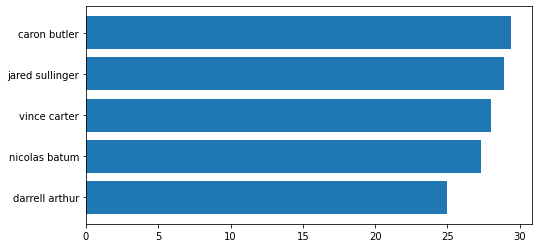

In [163]:
#worst 5 catch&shoot 3-point shooters
worst_5=group[group['FG_Attempted']>=100].sort_values(by=['persentage_of_shots']).reset_index()
worst_5=worst_5[:5]
fig = plt.figure(figsize = (8, 4))
plt.barh( worst_5['player_name'], worst_5['persentage_of_shots'])

<BarContainer object of 5 artists>

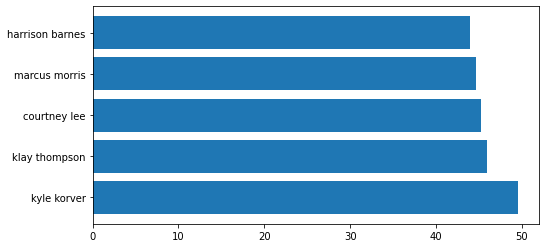

In [164]:
#best 5 catch&shoot 3-point shooters
best_5=group[group['FG_Attempted']>=100].sort_values(by=['persentage_of_shots'],ascending=False).reset_index()
best_5=best_5[:5]
fig = plt.figure(figsize = (8, 4))
plt.barh( best_5['player_name'], best_5['persentage_of_shots'])

# what is the relation b/w shot distance and shot %

In [129]:
group2 = data[['SHOT_DIST', 'PTS_TYPE','FGM']]
group2 = group2.groupby(['SHOT_DIST','PTS_TYPE']).agg(FG_Made=('FGM',np.sum),FG_Attempted=('FGM','count')).reset_index()

Text(0, 0.5, 'shots')

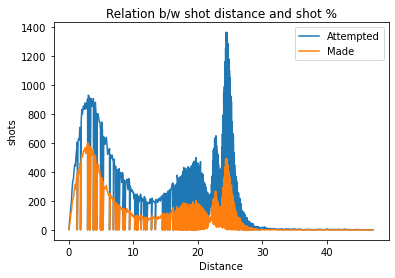

In [130]:
plt.title("Relation b/w shot distance and shot %")
plt.plot(group2['SHOT_DIST'],group2['FG_Attempted'],label='Attempted')
plt.plot(group2['SHOT_DIST'],group2['FG_Made'],label='Made')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('shots')

# what is overall shot distribution

In [413]:
missed_shots = data[['SHOT_DIST','FGM']]
missed_shots = missed_shots[(missed_shots['FGM']==0)&(missed_shots['SHOT_DIST']<=30) & (missed_shots['SHOT_DIST']>=0)]
made_shots =  data[['SHOT_DIST','FGM']]
made_shots = made_shots[(made_shots['FGM']==1)&(made_shots['SHOT_DIST']<=30) & (made_shots['SHOT_DIST']>=0)]

In [414]:
missed_shots_group = missed_shots.groupby(['SHOT_DIST']).agg(FG_miss=('FGM','count')).reset_index()
made_shots_group = made_shots.groupby(['SHOT_DIST']).agg(FG_made=('FGM','count')).reset_index()

shot_distribution = pd.merge(missed_shots_group,made_shots_group,on='SHOT_DIST')

In [415]:
shot_distribution['persentage_of_shots'] = (shot_distribution['FG_made']/shot_distribution.FG_miss).mul(100).round(1)

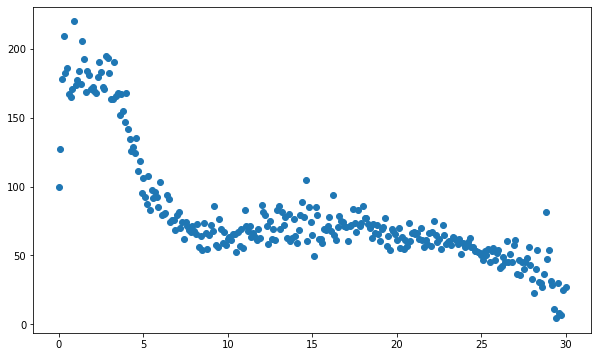

In [416]:
plt.figure(figsize = (10, 6))
plt.scatter(shot_distribution['SHOT_DIST'],shot_distribution['persentage_of_shots'])

# what players had highest % of shot attempts that were 3-ponters

In [396]:
player_Attempt = data[ (data['DRIBBLES']==0)]
player_Attempt = player_Attempt[(player_Attempt['TOUCH_TIME']>0) & (player_Attempt['TOUCH_TIME']<2) & (player_Attempt['SHOT_DIST']>=22)]

#droping all column except FGM and player_name
player_Attempt = player_Attempt.drop(['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSEST_DEFENDER','CLOSE_DEF_DIST','PTS'],axis = 1)
player_Attempt = player_Attempt.dropna()#drop rows with Nan values
player_Attempt = player_Attempt.reset_index(drop = True)#rearange indexes
player_Attempt

PTS_TYPE  FGM    player_name
0             3    0  brian roberts
1             3    0  brian roberts
2             3    0  brian roberts
3             3    0  brian roberts
4             3    0  brian roberts
...         ...  ...            ...
24932         3    1   jarrett jack
24933         3    0   jarrett jack
24934         3    0   jarrett jack
24935         3    0   jarrett jack
24936         3    0   jarrett jack

[24937 rows x 3 columns]

In [367]:
#player_highes_persentage_of_shot_attempts = player_hposa

#player shot_attempts that where 3pointers
player_hposa_of_3p=player_Attempt.groupby(['player_name','PTS_TYPE']).agg(FG_3p_Attempted=('FGM','count')).reset_index()
player_hposa_of_3p=player_hposa_of_3p[player_hposa_of_3p['PTS_TYPE']==3]

#player all shot_attempts
player_hposa=player_Attempt.groupby(['player_name']).agg(FG_Attempted=('FGM','count')).reset_index()
#merge both 
hposa=pd.merge(player_hposa, player_hposa_of_3p, on='player_name')

In [387]:
hposa['Attempted_3pt_persentage'] = (hposa['FG_3p_Attempted']/hposa['FG_Attempted']).mul(100).round(1)

In [410]:
#top 10 player with hposa
player_hposa_10=hposa.sort_values(by=['Attempted_3pt_persentage'],ascending=False).reset_index()
player_hposa_10 = player_hposa_10[player_hposa_10['FG_Attempted']>=250]
player_hposa_10 = player_hposa_10[:10]

<BarContainer object of 10 artists>

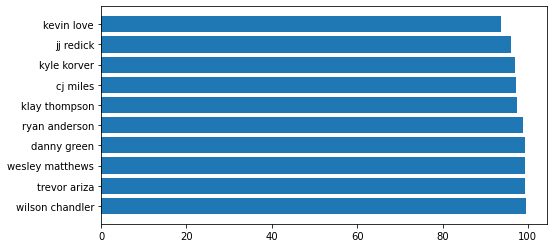

In [411]:
fig = plt.figure(figsize = (8, 4))
plt.barh( player_hposa_10['player_name'], player_hposa_10['Attempted_3pt_persentage'])

# what is relationship b/w shot distance and shot openness